<a id="1.1"></a>
## <b>1.1 <span style='color:#E1B12D'>Import Libraries</span></b> 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')

from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier


In [2]:
#Seaborn settings for visualizations!
rc = {
    "axes.facecolor": "#f7f9fc",
    "figure.facecolor": "#f7f9fc",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

default_palette = 'YlOrRd'

sns.set(rc=rc)
pd.set_option('display.max_columns',35)
pd.options.display.float_format = '{:,.2f}'.format



<a id="1.2"></a>
## <b>1.2 <span style='color:#E1B12D'>Import Data</span></b> 

In [3]:
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [4]:
#Let's check the Shape of data
print(f'The Train dataset has {df_train.shape[0]} rows and {df_train.shape[1]} columns')
print(f'The Test dataset has {df_test.shape[0]} rows and {df_test.shape[1]} columns')

The Train dataset has 20758 rows and 18 columns
The Test dataset has 13840 rows and 17 columns




<a id="1.3"></a>
## <b>1.3 <span style='color:#E1B12D'>Quick overview</span></b> 

In [5]:
#Let's check the samples of data
display('Train:',df_train.head())
display('Test:',df_test.head())

'Train:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.44,1.70,81.67,yes,yes,2.00,2.98,Sometimes,no,2.76,no,0.00,0.98,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.00,1.56,57.00,yes,yes,2.00,3.00,Frequently,no,2.00,no,1.00,1.00,no,Automobile,Normal_Weight
2,2,Female,18.00,1.71,50.17,yes,yes,1.88,1.41,Sometimes,no,1.91,no,0.87,1.67,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.95,1.71,131.27,yes,yes,3.00,3.00,Sometimes,no,1.67,no,1.47,0.78,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.64,1.91,93.80,yes,yes,2.68,1.97,Sometimes,no,1.98,no,1.97,0.93,Sometimes,Public_Transportation,Overweight_Level_II


'Test:'

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.90,1.85,120.64,yes,yes,2.94,3.00,Sometimes,no,2.83,no,0.86,0.00,Sometimes,Public_Transportation
1,20759,Female,21.00,1.60,66.00,yes,yes,2.00,1.00,Sometimes,no,3.00,no,1.00,0.00,Sometimes,Public_Transportation
2,20760,Female,26.00,1.64,111.60,yes,yes,3.00,3.00,Sometimes,no,2.62,no,0.00,0.25,Sometimes,Public_Transportation
3,20761,Male,20.98,1.55,103.67,yes,yes,2.00,2.98,Sometimes,no,2.79,no,0.09,0.00,Sometimes,Public_Transportation
4,20762,Female,26.00,1.63,104.84,yes,yes,3.00,3.00,Sometimes,no,2.65,no,0.00,0.74,Sometimes,Public_Transportation


In [6]:
print("# Train Data INFO\n")
print(df_train.info())
print('\n')
print("\n# Original Data INFO\n")
print(original.info())

# Train Data INFO

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC          

In [7]:
from tabulate import tabulate
data = [
    ["FAVC", "Frequent consumption of high caloric food"],
    ["FCVC", "Frequency of consumption of vegetables"],
    ["NCP", "Number of main meals"],
    ["CAEC", "Consumption of food between meals"],
    ["CH20", "Consumption of water daily"],
    ["CALC", "Consumption of alcohol"],
    ["SCC", "Calories consumption monitoring"],
    ["FAF", "Physical activity frequency"],
    ["TUE", "Time using technology devices"],
    ["MTRANS", "Transportation used"]
]
headers = ["Abbreviation", "Full Form"]

table = tabulate(data, headers, tablefmt="pipe")
print(table)

| Abbreviation   | Full Form                                 |
|:---------------|:------------------------------------------|
| FAVC           | Frequent consumption of high caloric food |
| FCVC           | Frequency of consumption of vegetables    |
| NCP            | Number of main meals                      |
| CAEC           | Consumption of food between meals         |
| CH20           | Consumption of water daily                |
| CALC           | Consumption of alcohol                    |
| SCC            | Calories consumption monitoring           |
| FAF            | Physical activity frequency               |
| TUE            | Time using technology devices             |
| MTRANS         | Transportation used                       |




<a id="1.4"></a>
## <b>1.4 <span style='color:#E1B12D'>Summary of the data</span></b> 

In [8]:
def summary(df):
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['Duplicate'] = df.duplicated().sum()
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['avg'] = desc['mean'].values
    summ['std dev'] = desc['std'].values
    summ['top value'] = desc['top'].values
    summ['Freq'] = desc['freq'].values

    return summ

In [9]:
summary(df_train.drop(columns=["id"]))

,data type,#missing,Duplicate,#unique,min,max,avg,std dev,top value,Freq
Gender,object,0,0,2,NaN,NaN,NaN,NaN,Female,10422
Age,float64,0,0,1703,14.00,61.00,23.84,5.69,NaN,NaN
Height,float64,0,0,1833,1.45,1.98,1.70,0.09,NaN,NaN
Weight,float64,0,0,1979,39.00,165.06,87.89,26.38,NaN,NaN
family_history_with_overweight,object,0,0,2,NaN,NaN,NaN,NaN,yes,17014
FAVC,object,0,0,2,NaN,NaN,NaN,NaN,yes,18982
FCVC,float64,0,0,934,1.00,3.00,2.45,0.53,NaN,NaN
NCP,float64,0,0,689,1.00,4.00,2.76,0.71,NaN,NaN
CAEC,object,0,0,4,NaN,NaN,NaN,NaN,Sometimes,17529
SMOKE,object,0,0,2,NaN,NaN,NaN,NaN,no,20513


<a id="2"></a>
## <b>2 <span style='color:#E1B12D'> Exploratory Data Analysis</span></b> 

In [10]:
def showplot(columnname):
    plt.rcParams['figure.facecolor'] = 'white'
    plt.rcParams['axes.facecolor'] = 'white'
    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    ax = ax.flatten()
    value_counts = df_train[columnname].value_counts()
    labels = value_counts.index.tolist()
    colors =["#4caba4", "#d68c78",'#a3a2a2','#ab90a0', '#e6daa3', '#6782a8', '#8ea677']
    
    # Donut Chart
    wedges, texts, autotexts = ax[0].pie(
        value_counts, autopct='%1.1f%%',textprops={'size': 9, 'color': 'white','fontweight':'bold' }, colors=colors,
        wedgeprops=dict(width=0.35),  startangle=80,   pctdistance=0.85  )
    # circle
    centre_circle = plt.Circle((0, 0), 0.6, fc='white')
    ax[0].add_artist(centre_circle)
    
    # Count Plot
    sns.countplot(data=df_train, y=columnname, ax=ax[1], palette=colors, order=labels)
    for i, v in enumerate(value_counts):
        ax[1].text(v + 1, i, str(v), color='black',fontsize=10, va='center')
    sns.despine(left=True, bottom=True)
    plt.yticks(fontsize=9,color='black')
    ax[1].set_ylabel(None)
    plt.xlabel("")
    plt.xticks([])
    fig.suptitle(columnname, fontsize=15, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    plt.show()


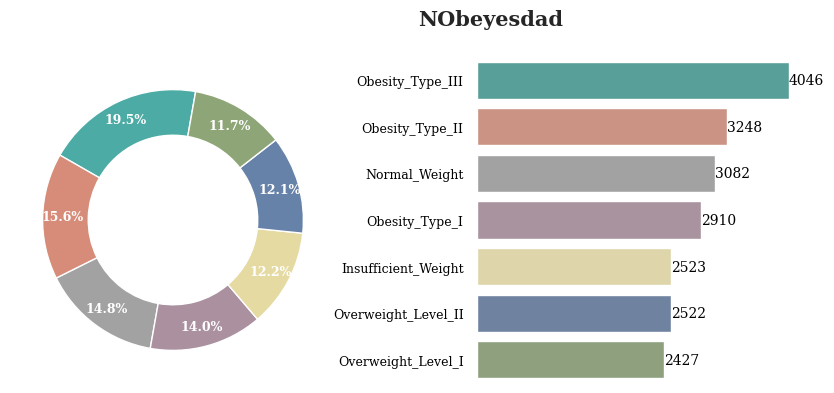

In [11]:
showplot("NObeyesdad")

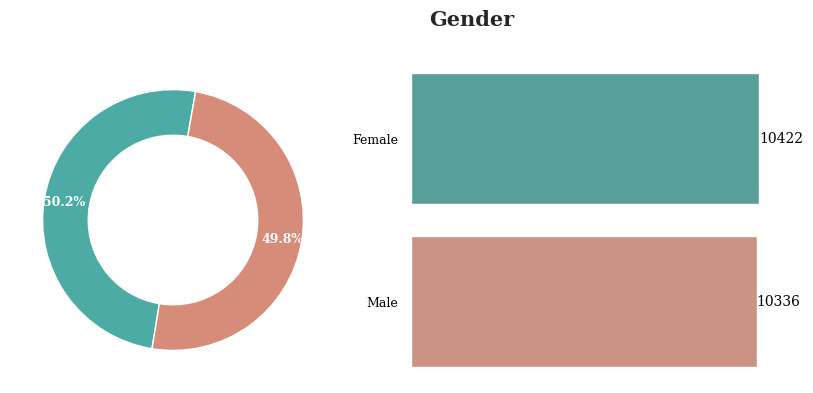

In [12]:
showplot('Gender')

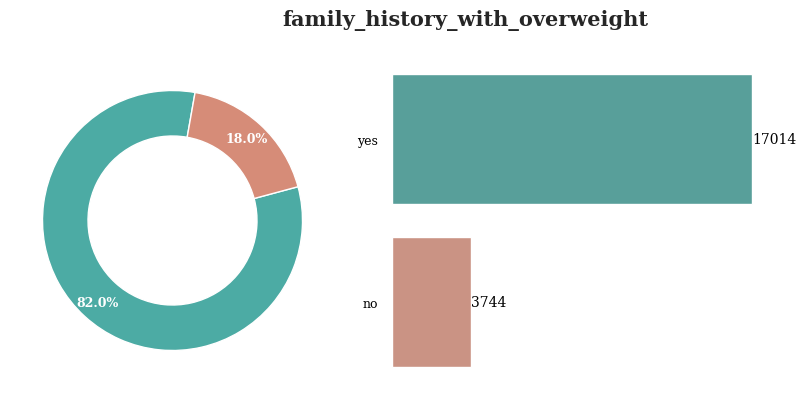

In [13]:
showplot("family_history_with_overweight")

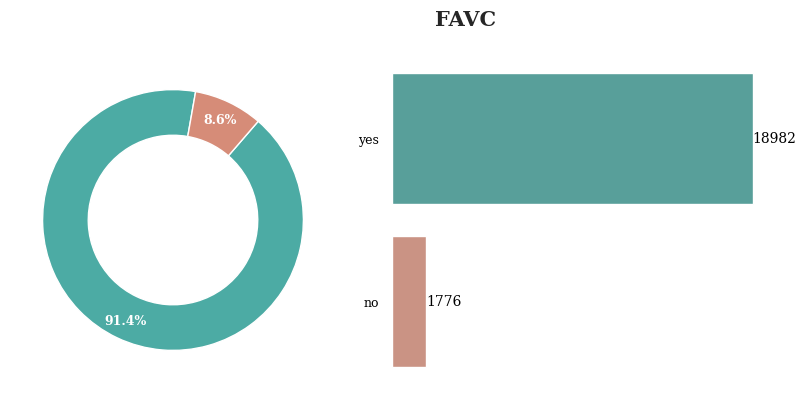

In [14]:
showplot("FAVC")

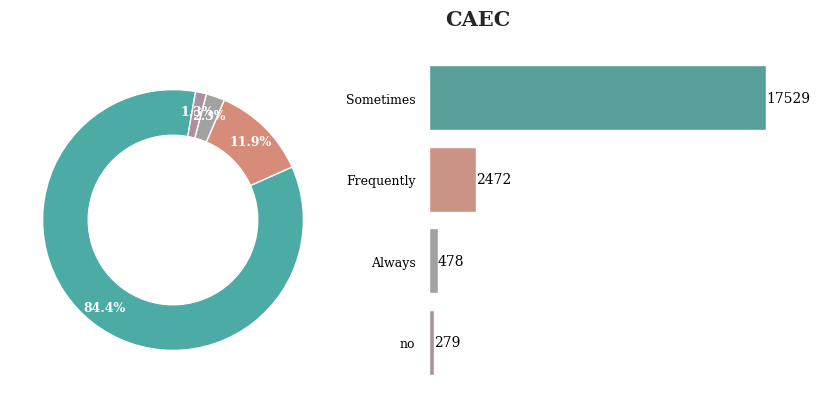

In [15]:
showplot("CAEC")

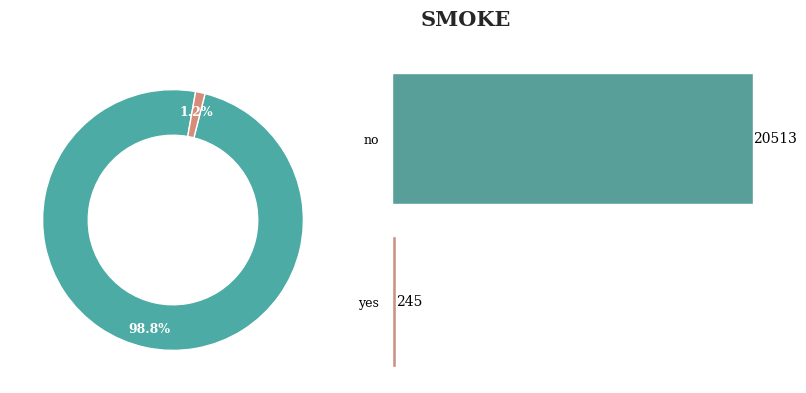

In [16]:
showplot("SMOKE")

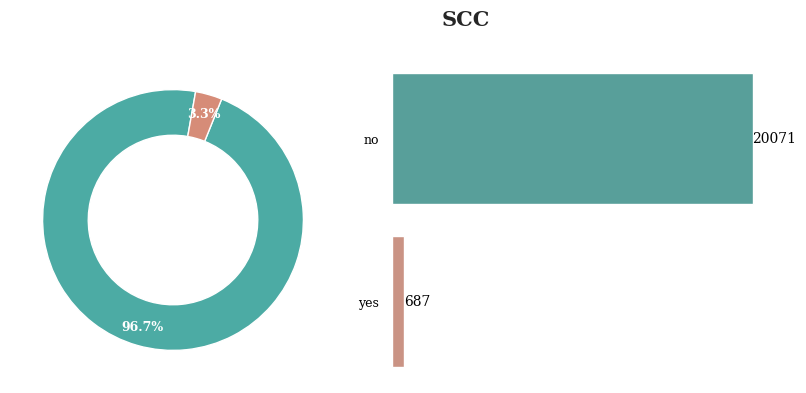

In [17]:
showplot("SCC")

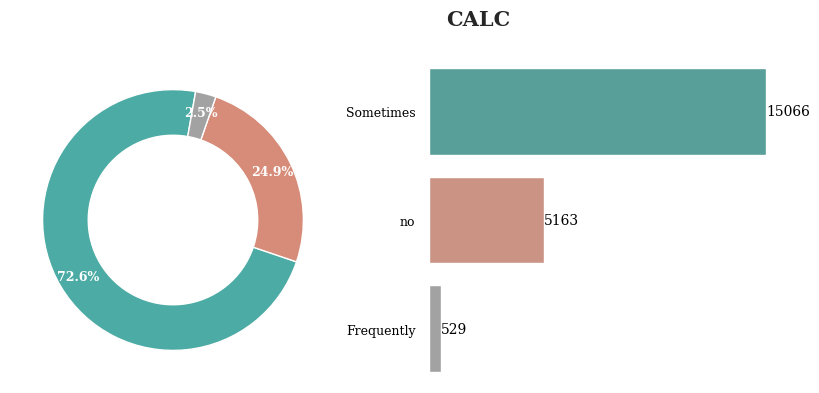

In [18]:
showplot("CALC")

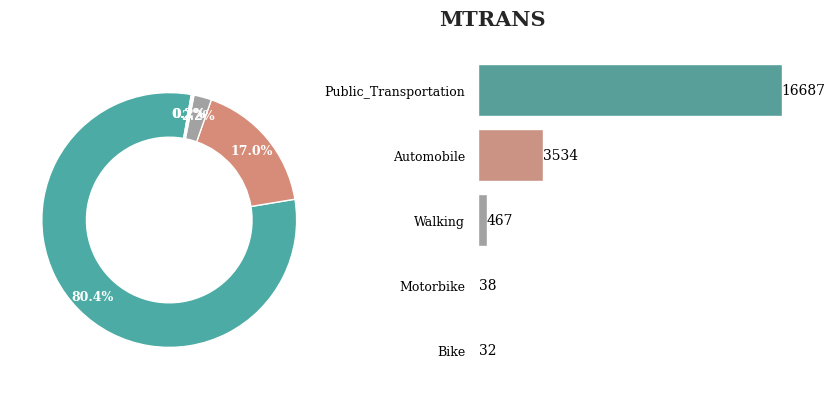

In [19]:
showplot("MTRANS")

In [20]:
# Checking for distributions
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
def dist(train_dataset, original_dataset, columns_list, rows, cols):
    fig, axs = plt.subplots(rows, cols, figsize=(24, 10))
    plt.suptitle('Distribution for numerical features: Train vs Original Dataset', fontsize=16, fontweight='bold')
    axs = axs.flatten()
    
    for i, col in enumerate(columns_list):
        sns.kdeplot(train_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#05b0a3', label='Train')
        sns.kdeplot(original_dataset[col], ax=axs[i], fill=True, alpha=0.5, linewidth=0.5, color='#d68c78', label='Original')
        axs[i].set_title(f'{col}, Train skewness: {train_dataset[col].skew():.2f}\n Original skewness: {original_dataset[col].skew():.2f}')
        axs[i].legend()
        
    plt.tight_layout()

In [ ]:
dist(train_dataset=df_train, original_dataset=original, columns_list=numeric_columns.columns, rows=2, cols=4)

In [ ]:
colors = ['#1f77b4', '#fc6c44', '#2b8a2b', '#fc7c7c', '#9467bd', '#4ba4ad', '#c7ad18', '#7f7f7f', '#69d108']
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
ax1 = sns.scatterplot(x=df_train['Height'], y=df_train['Age'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[0])
axes[0].set_title('Height vs Age')
ax2 = sns.scatterplot(x=df_train['Height'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[1])
axes[1].set_title('Height vs Weight')
ax3 = sns.scatterplot(x=df_train['Age'], y=df_train['Weight'], hue="NObeyesdad",
                       data=df_train, palette=colors, edgecolor='grey', alpha=0.8, s=9, ax=axes[2])
axes[2].set_title('Age vs Weight')
for ax in axes.flatten():
    ax.get_legend().remove()
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=len(df_train['NObeyesdad'].unique()),
           title='')
fig.suptitle('Age, Height, Weight against Target', fontsize=20)
fig.subplots_adjust(bottom=0.5, top=0.9, hspace=0.5)
plt.tight_layout()
plt.show()

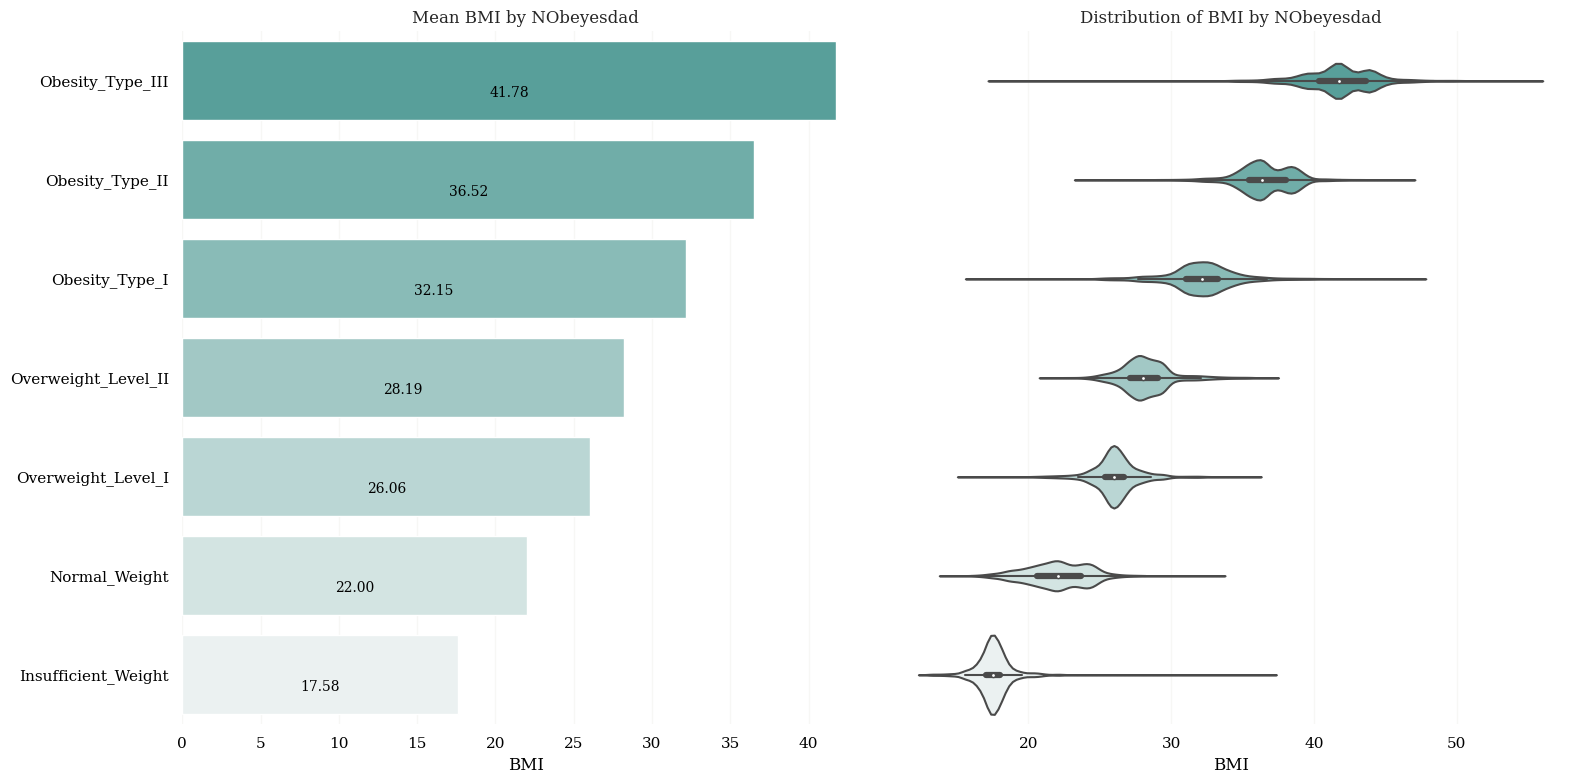

In [23]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by NObeyesdad')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

In [24]:
df_train.groupby('NObeyesdad')['BMI'].describe().reset_index().style.background_gradient()

,NObeyesdad,count,mean,std,min,25%,50%,75%,max
0,Insufficient_Weight,2523.000000,17.583619,1.388408,12.868541,17.025801,17.506390,18.025957,36.778115
1,Normal_Weight,3082.000000,22.000999,2.194097,14.631670,20.568937,22.038567,23.661439,32.882414
2,Obesity_Type_I,2910.000000,32.154649,2.513458,16.597443,31.020408,32.121386,33.298647,46.805188
3,Obesity_Type_II,3248.000000,36.521958,2.112538,24.048460,35.436970,36.378753,38.023475,46.222483
4,Obesity_Type_III,4046.000000,41.781745,2.670789,18.178670,40.371119,41.750620,43.615233,54.997991
5,Overweight_Level_I,2427.000000,26.059270,1.768697,15.761880,25.390625,25.963757,26.672763,35.555556
6,Overweight_Level_II,2522.000000,28.192491,1.835666,21.513859,27.080170,28.020083,29.086346,36.741456


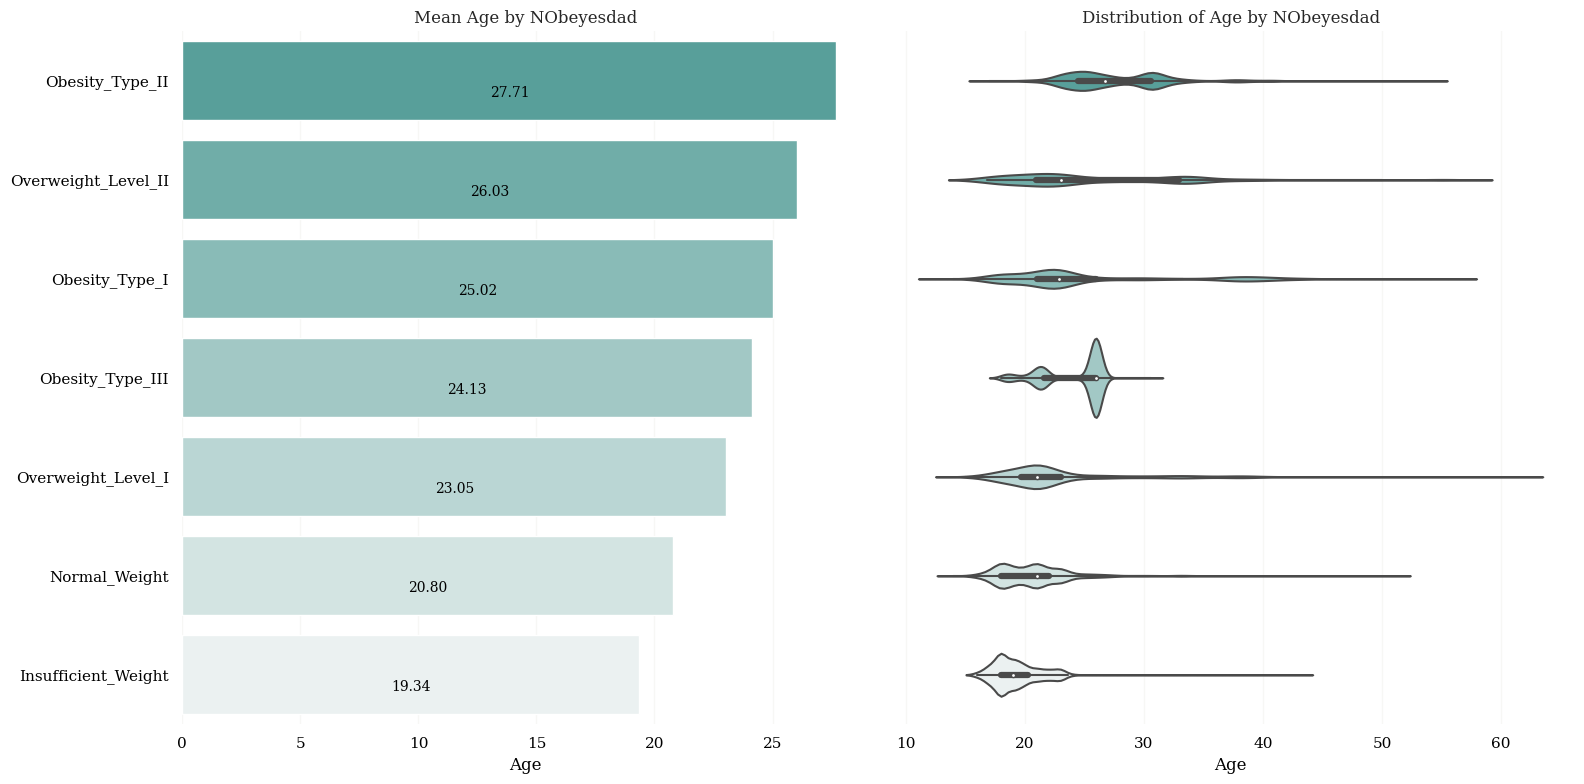

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax1 = axes[0]
df_sort = df_train.groupby('NObeyesdad')['Age'].mean().sort_values(ascending=False).index
sns.barplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 20), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean Age by NObeyesdad')
ax1.set_xlabel('Age')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)

# Violin Plot
ax2 = axes[1]
sns.violinplot(x='Age', y='NObeyesdad', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of Age by NObeyesdad')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

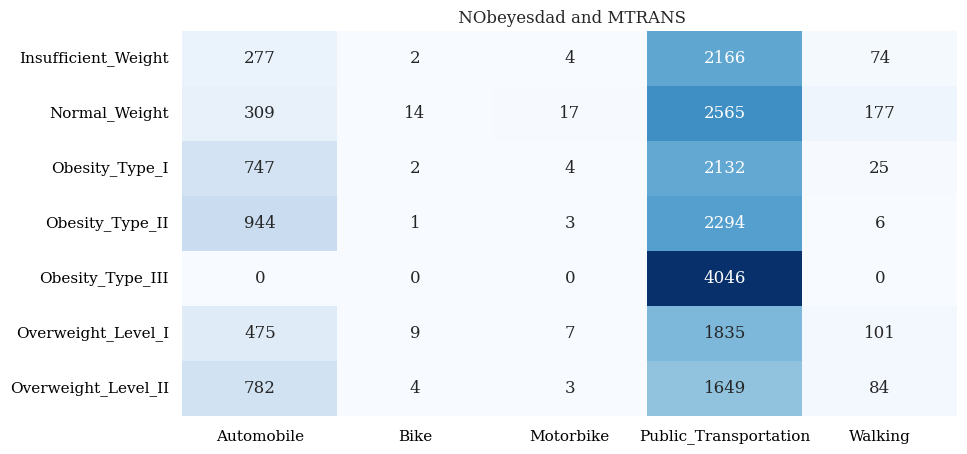

In [26]:
cross_tab = pd.crosstab(df_train['NObeyesdad'], df_train['MTRANS'])
plt.figure(figsize=(10, 5))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.title(' NObeyesdad and MTRANS')
plt.xlabel('')
plt.ylabel('')
plt.show()

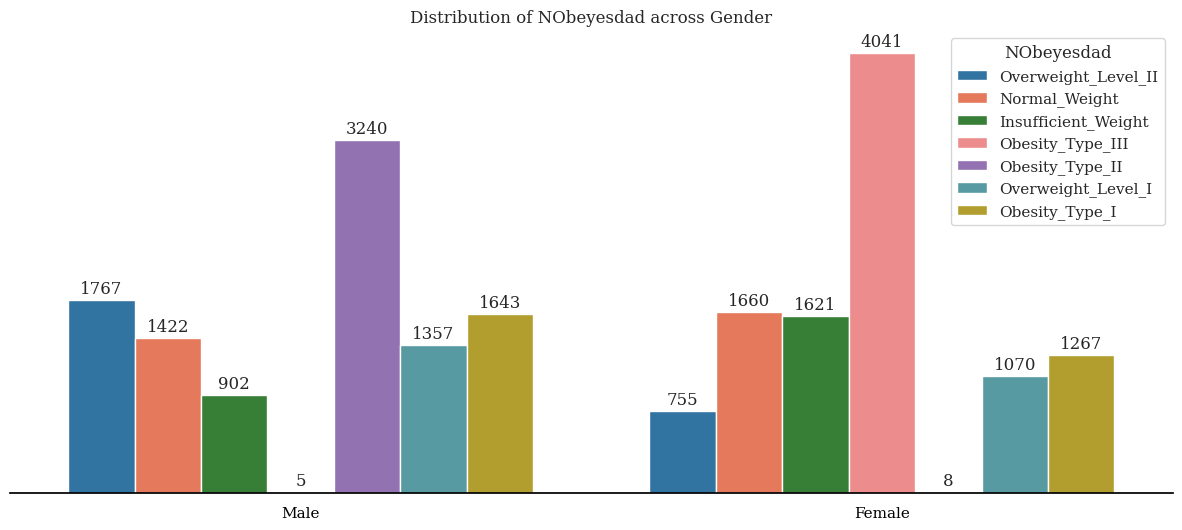

In [27]:
plt.figure(figsize=(15, 6))
ax = sns.countplot(x='Gender', hue='NObeyesdad', data=df_train, palette=colors, dodge=True)
plt.title('Distribution of NObeyesdad across Gender')
sns.despine(left=True, bottom=False)
plt.xlabel('')
plt.ylabel('')
plt.yticks([])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{round(height)}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 8), textcoords='offset points')
plt.show()

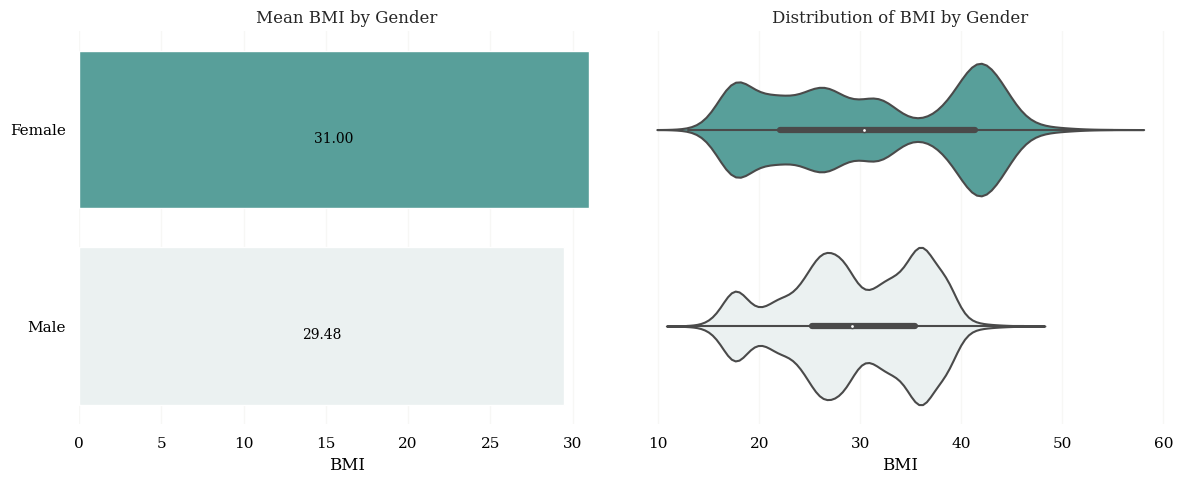

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
df_train['BMI']=  df_train['Weight'] / df_train['Height']**2
ax1 = axes[0]
df_sort = df_train.groupby('Gender')['BMI'].mean().sort_values(ascending=False).index
sns.barplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort,
            estimator=np.mean, ci=None, errwidth=0, ax=ax1)
for p in ax1.patches:
    ax1.annotate(f'{p.get_width():.2f}', (p.get_x() + p.get_width() / 2., p.get_y() + p.get_height()),
                ha='center', va='center', xytext=(0, 50), textcoords='offset points', fontsize=10, color='black')
ax1.set_title('Mean BMI by Gender')
ax1.set_xlabel('BMI')
ax1.set_ylabel('')
sns.despine(left=True, bottom=True, ax=ax1)
# Violin Plot
ax2 = axes[1]
sns.violinplot(x='BMI', y='Gender', data=df_train, palette='light:#4caba4_r', order=df_sort, ax=ax2)
ax2.set_title('Distribution of BMI by Gender')
ax2.set_ylabel("")
plt.yticks([])
sns.despine(left=True, bottom=True, ax=ax2)
plt.tight_layout()
plt.show()

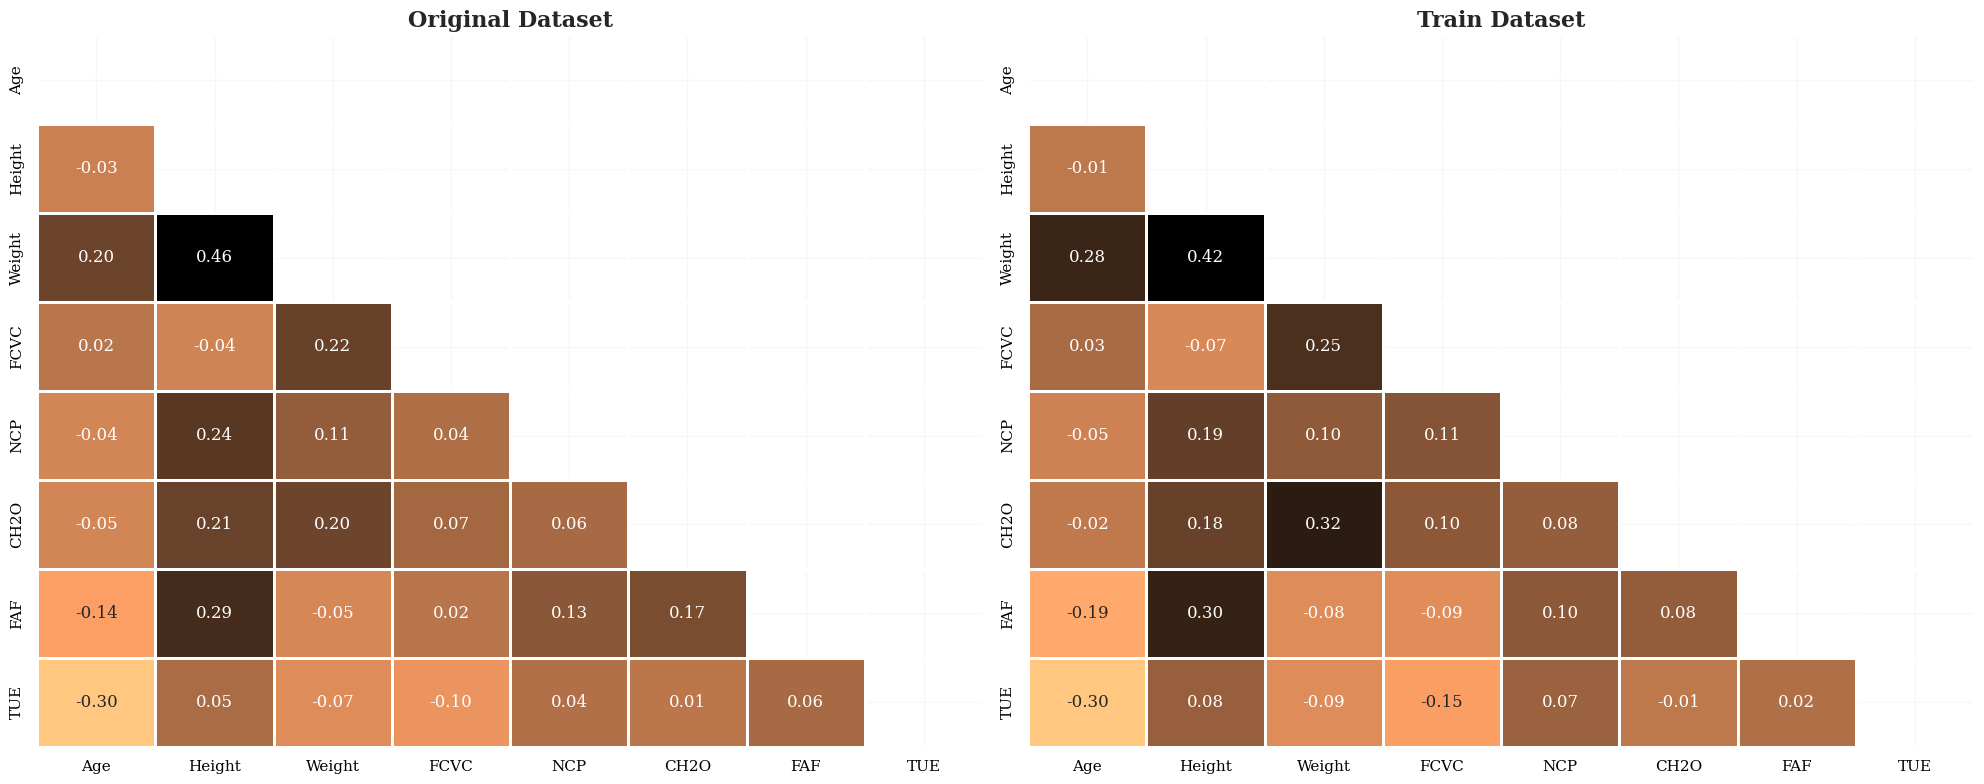

In [29]:
#Correlation heatmap
numeric_columns_original = original.select_dtypes(include=np.number)
numeric_columns_train = df_train.select_dtypes(include=np.number).drop(['id','BMI'], axis=1)
# original
corr_original = numeric_columns_original.corr(method='pearson')
mask_original = np.triu(np.ones_like(corr_original))
fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.heatmap(corr_original, annot=True, fmt='.2f', mask=mask_original, cmap='copper_r', cbar=None, linewidth=2, ax=axes[0])
axes[0].set_title('Original Dataset', fontsize=16, fontweight='bold')

# Train
corr_train = numeric_columns_train.corr(method='pearson')
mask_train = np.triu(np.ones_like(corr_train))
sns.heatmap(corr_train, annot=True, fmt='.2f', mask=mask_train, cmap='copper_r', cbar=None, linewidth=2, ax=axes[1])
axes[1].set_title('Train Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

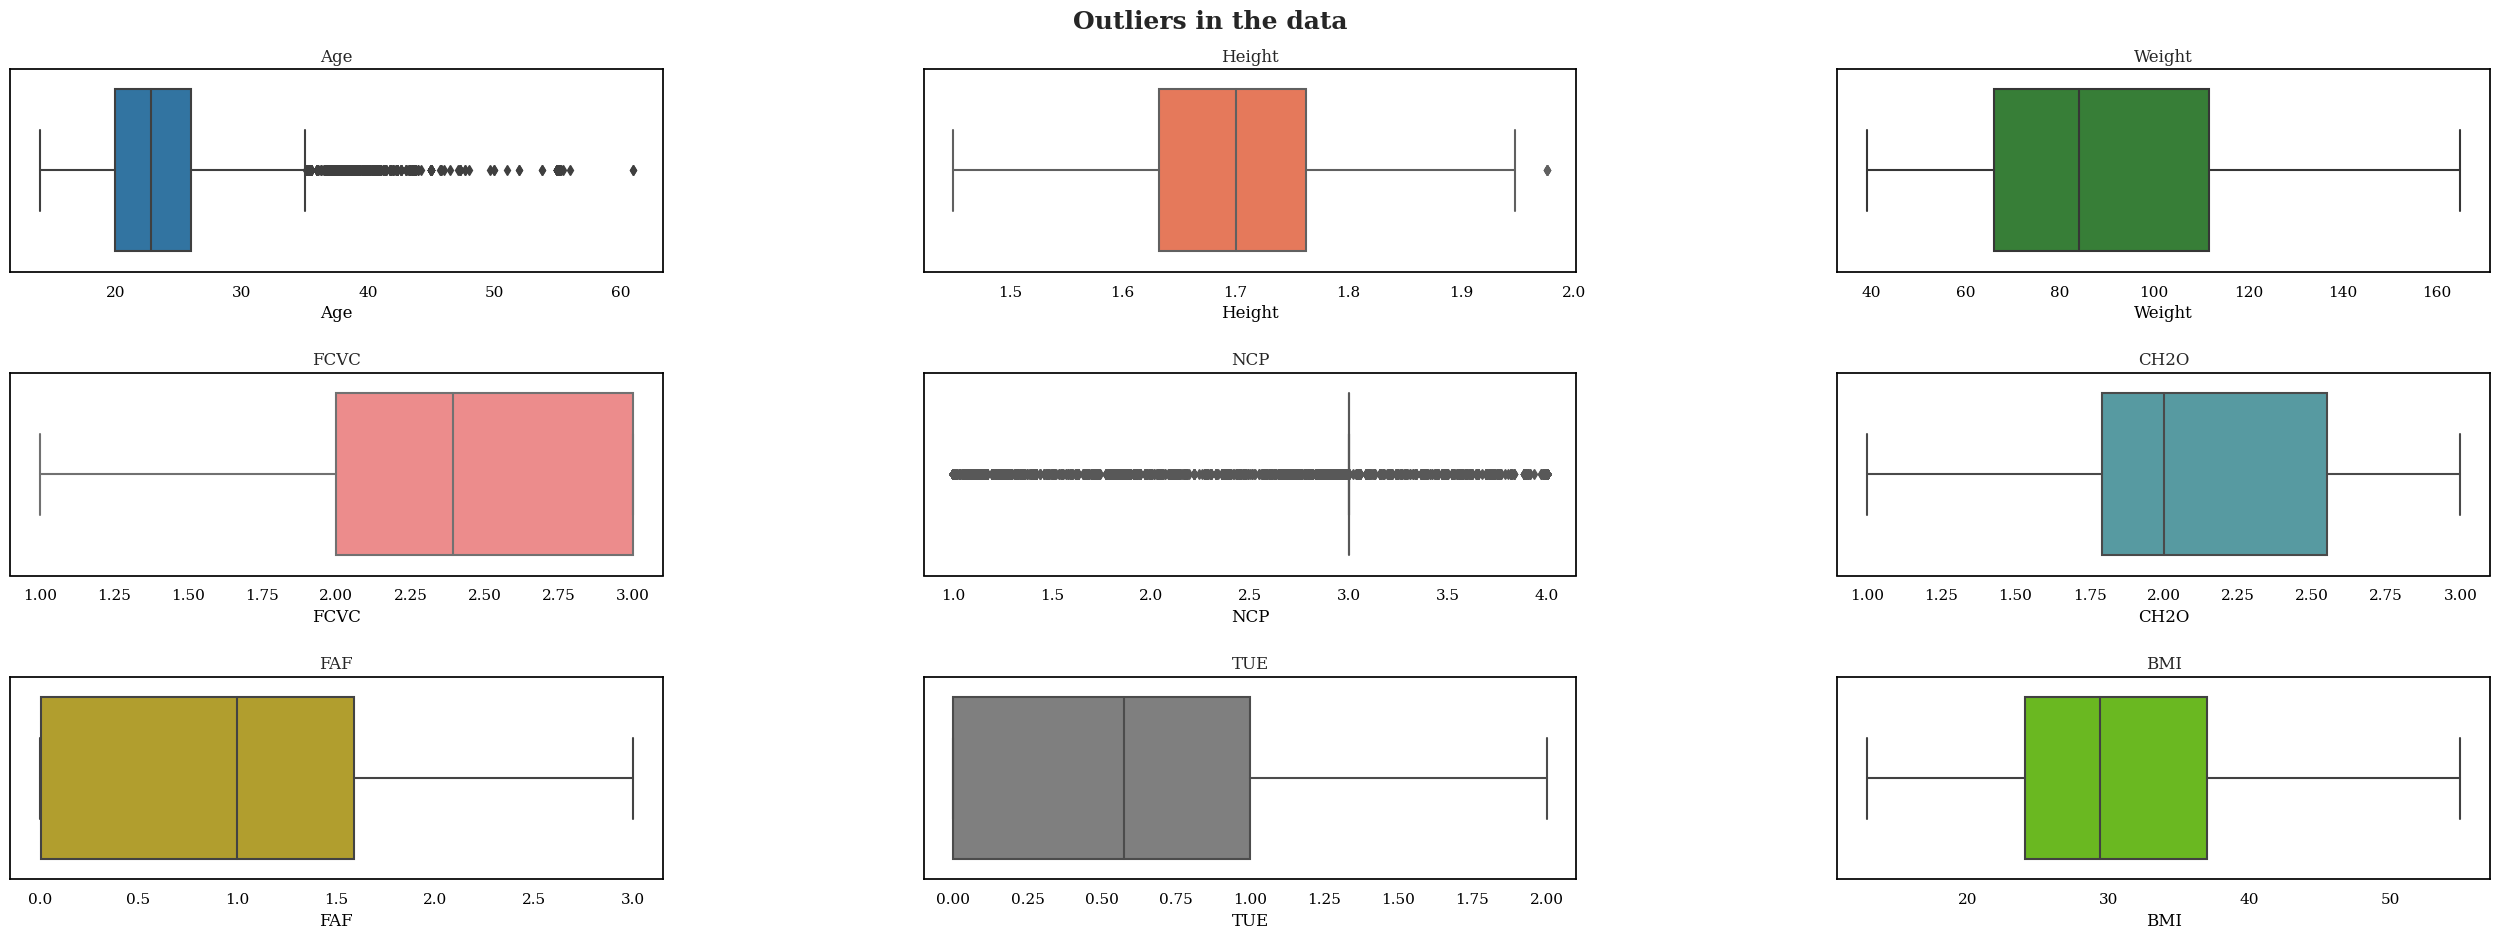

In [30]:
#Check for presence of outliers in each feature
numeric_columns = df_train.select_dtypes(include=['float64', 'int64']).drop(columns=['id'], axis=1)
fig = plt.figure(figsize=[32,10])
plt.suptitle('Outliers in the data', fontsize=18, fontweight='bold')
fig.subplots_adjust(top=0.92);
fig.subplots_adjust(hspace=0.5, wspace=0.4);
for i ,col in enumerate(numeric_columns):
    ax = fig.add_subplot(3,3, i+1);
    ax = sns.boxplot(data = df_train, x=col ,  color= colors[i]);
    ax.set_title(f'{col}')
    ax.set_xlabel(f'{col}')
    ax.grid(False)
plt.show()



<a id="3"></a>
## <b>3.1 <span style='color:#E1B12D'>Plotting Distribution of a Categorical Columns</span></b> 


In [35]:
#Loading the dataset again to revert previously made changed on BMI etc.
df_train = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
original = pd.read_csv('/kaggle/input/obesity-or-cvd-risk-classifyregressorcluster/ObesityDataSet.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
df_train.name = "Train Dataset"
original.name = "Original Dataset"


In [32]:
def get_variable_types(dataframe):
    continuous_vars = []
    categorical_vars = []

    for column in dataframe.columns:
        if dataframe[column].dtype == 'object':
            categorical_vars.append(column)
        else:
            continuous_vars.append(column)

    return continuous_vars, categorical_vars

continuous_vars, categorical_vars = get_variable_types(df_train)
categorical_vars.remove('NObeyesdad')
print("Continuous Variables:", continuous_vars)
print("Categorical Variables:", categorical_vars)

Continuous Variables: ['id', 'Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
Categorical Variables: ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [33]:
def plot_distribution(dataframe, target_column):
    # Calculate value counts
    value_counts = dataframe[target_column].value_counts()

    # Create a figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

    # Bar plot on the first subplot
    sns.barplot(x=value_counts.index, y=value_counts.values, palette="viridis", ax=ax1)
    ax1.set_xlabel(target_column, fontsize=12)
    ax1.set_ylabel('Count', fontsize=12)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right', fontsize=10)

    # Add data labels above each bar
    for index, value in enumerate(value_counts):
        ax1.text(index, value, str(value), ha='center', va='bottom', fontsize=10)

    # Pie plot on the second subplot
    ax2.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', colors=sns.color_palette("viridis", len(value_counts)))
    ax2.axis('equal')

    # Main title for the figure
    fig.suptitle(f'Comparison of {target_column} Distribution in ({dataframe.name})', fontsize=18)
    
    # Adjust layout and display the figure
    plt.tight_layout()
    plt.show()


<a id="3"></a>
## <b>3.2 <span style='color:#E1B12D'>Target Column Distribution Analysis</span></b> 

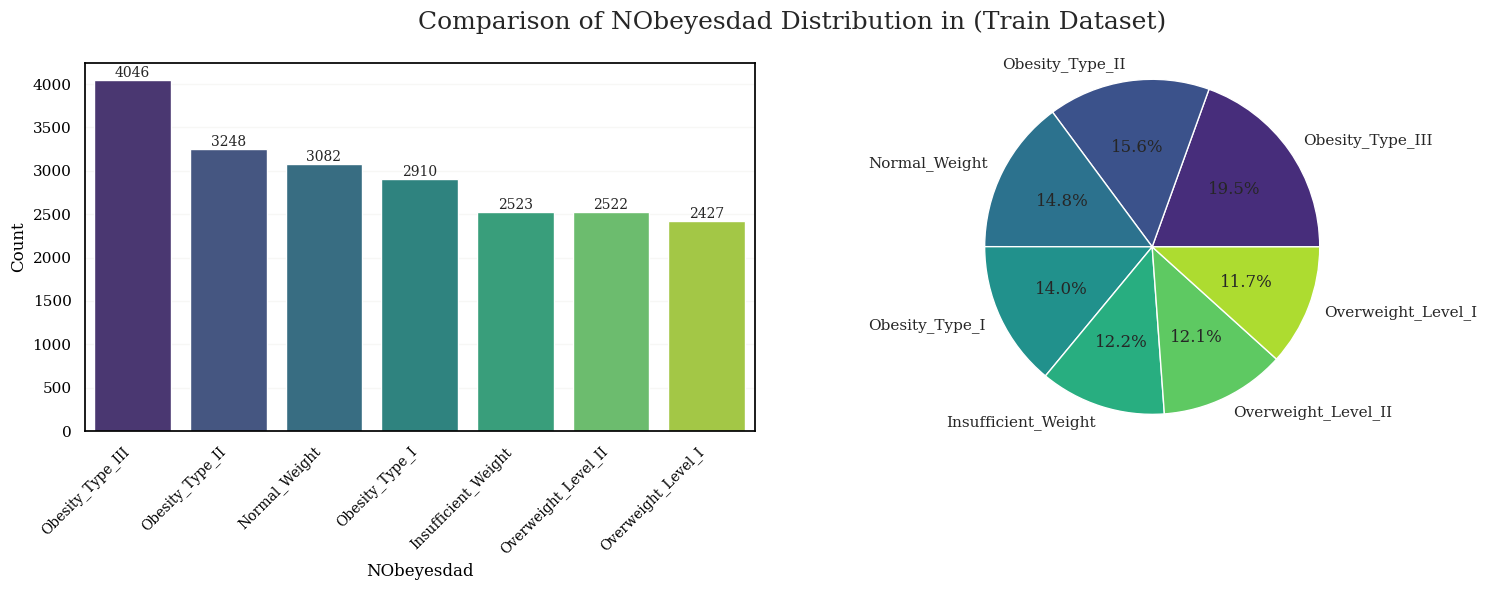

In [36]:
plot_distribution(df_train, 'NObeyesdad')

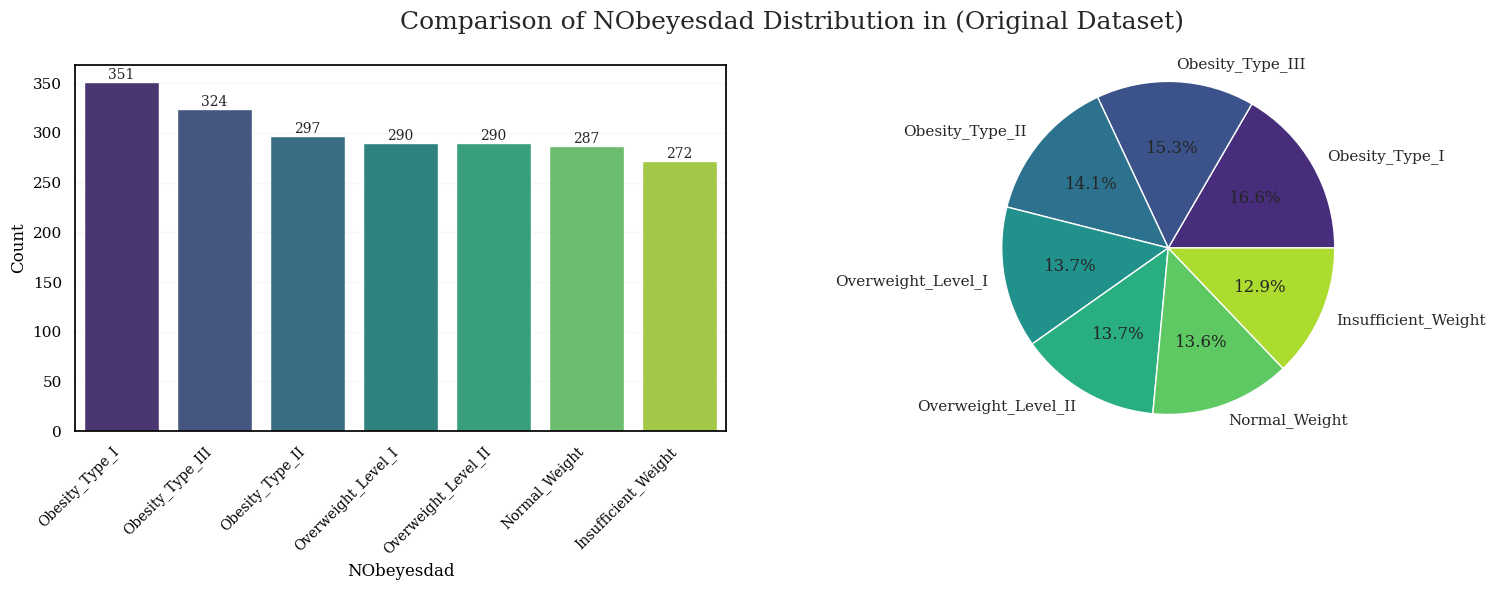

In [37]:
plot_distribution(original, 'NObeyesdad')

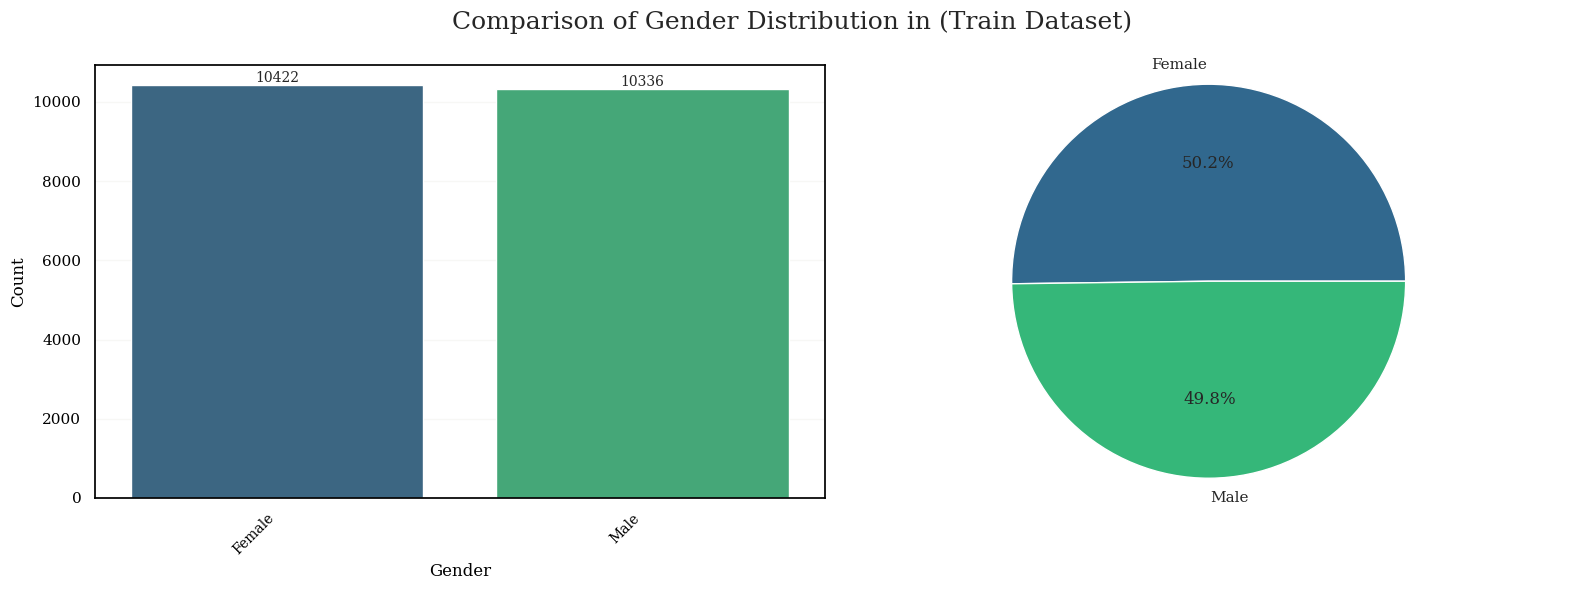

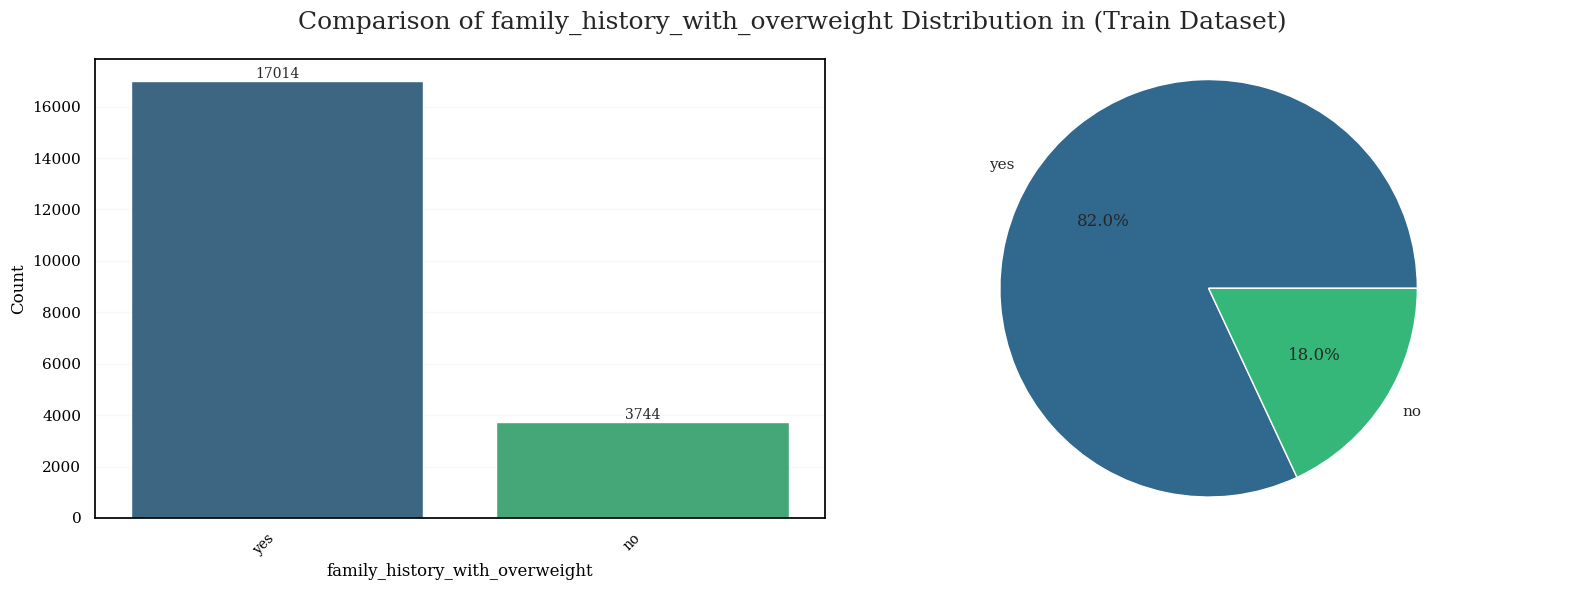

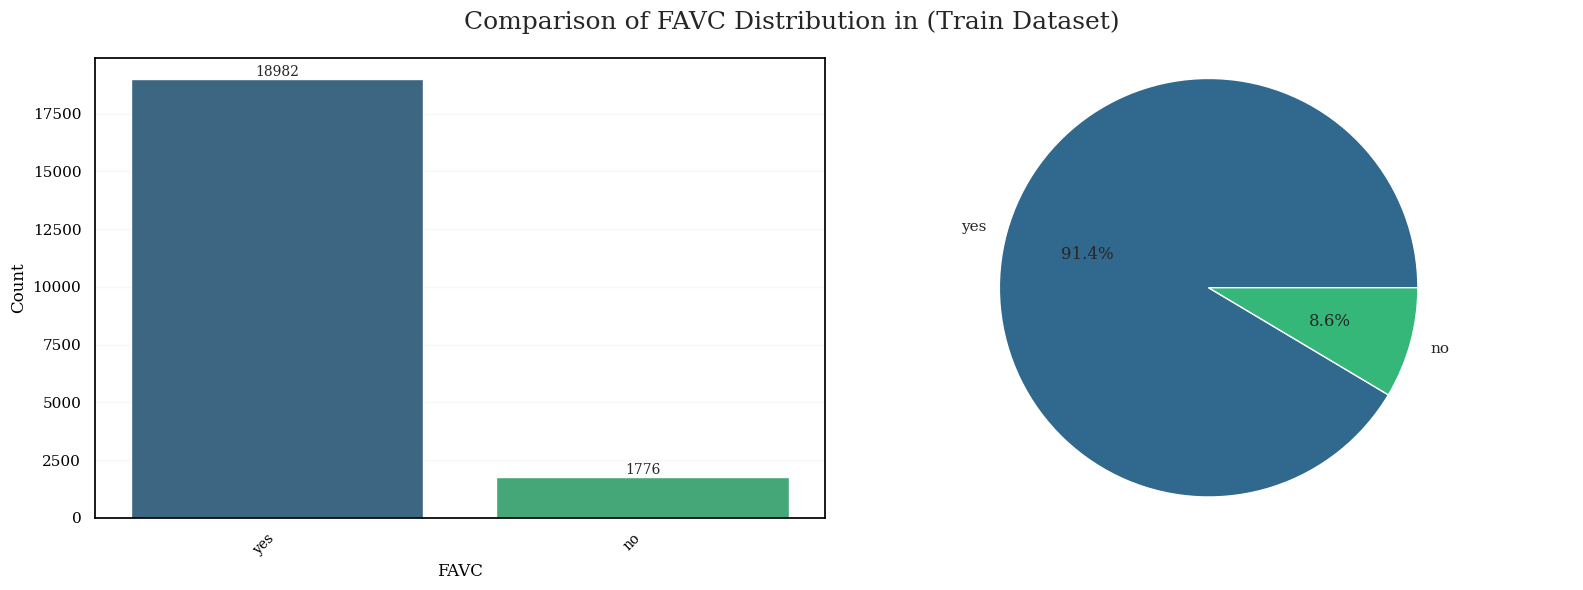

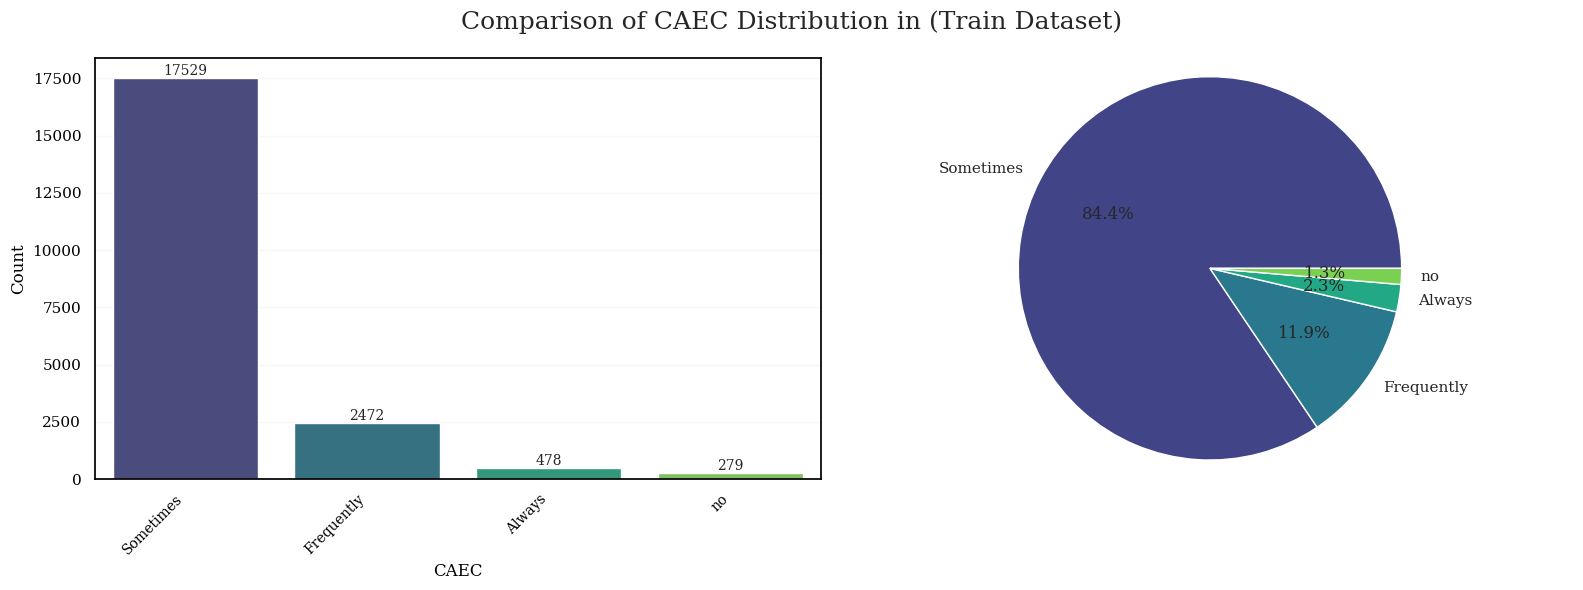

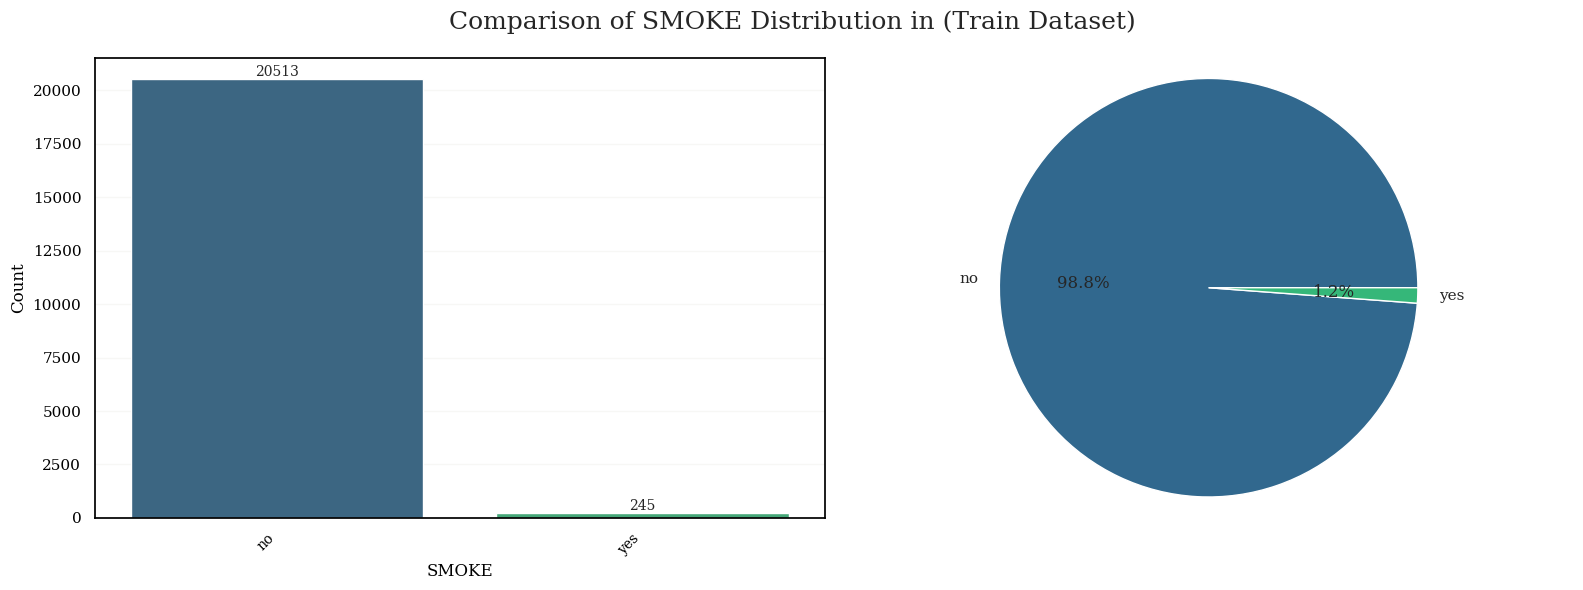

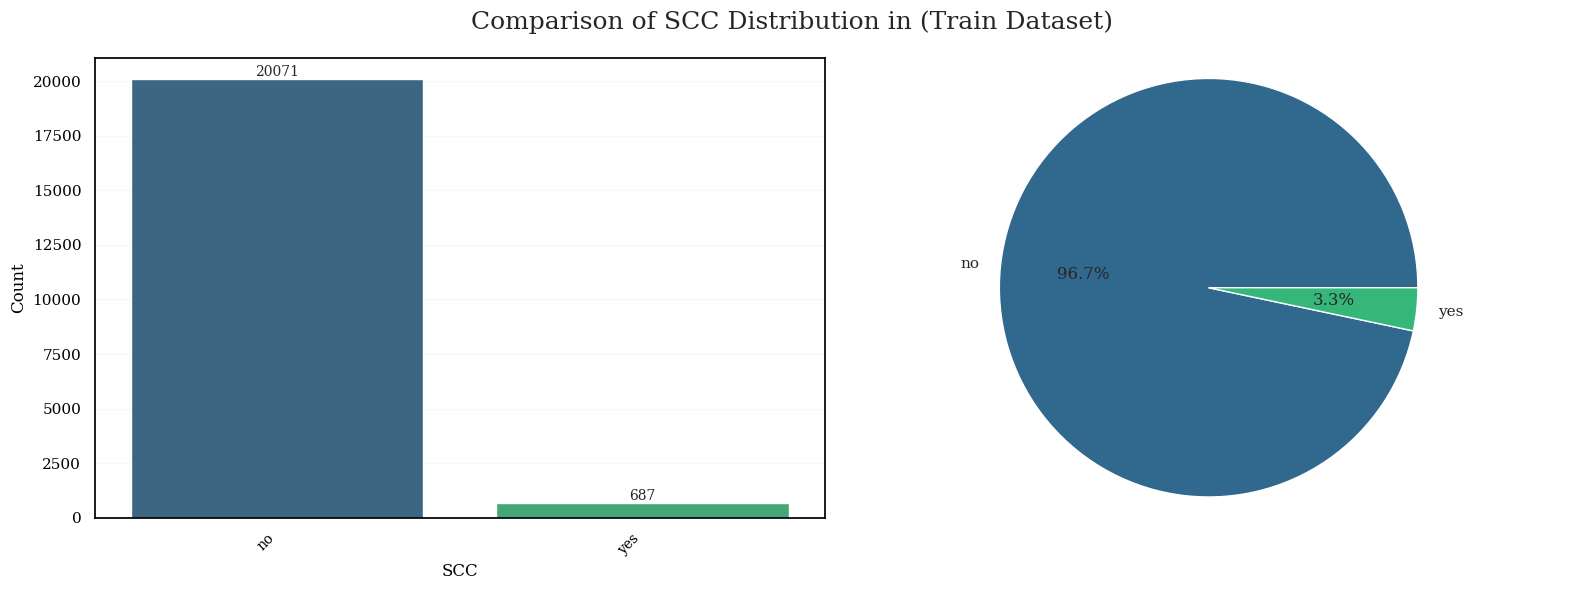

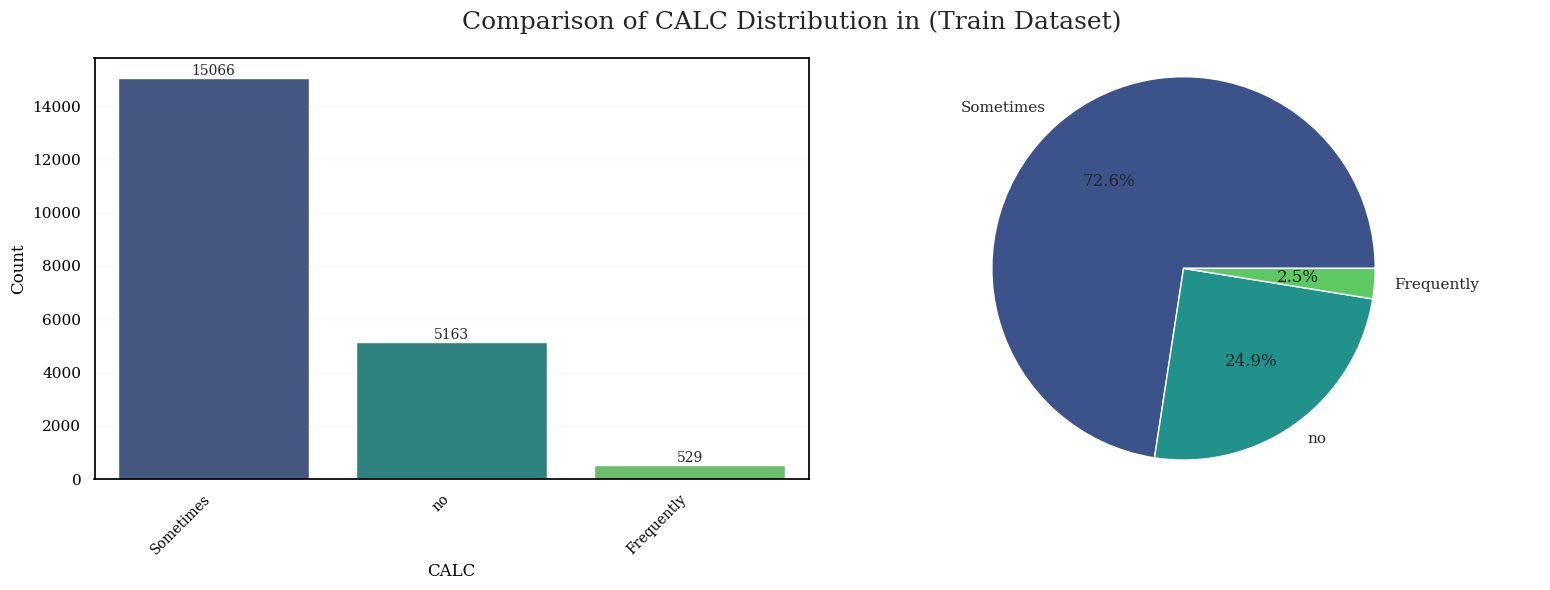

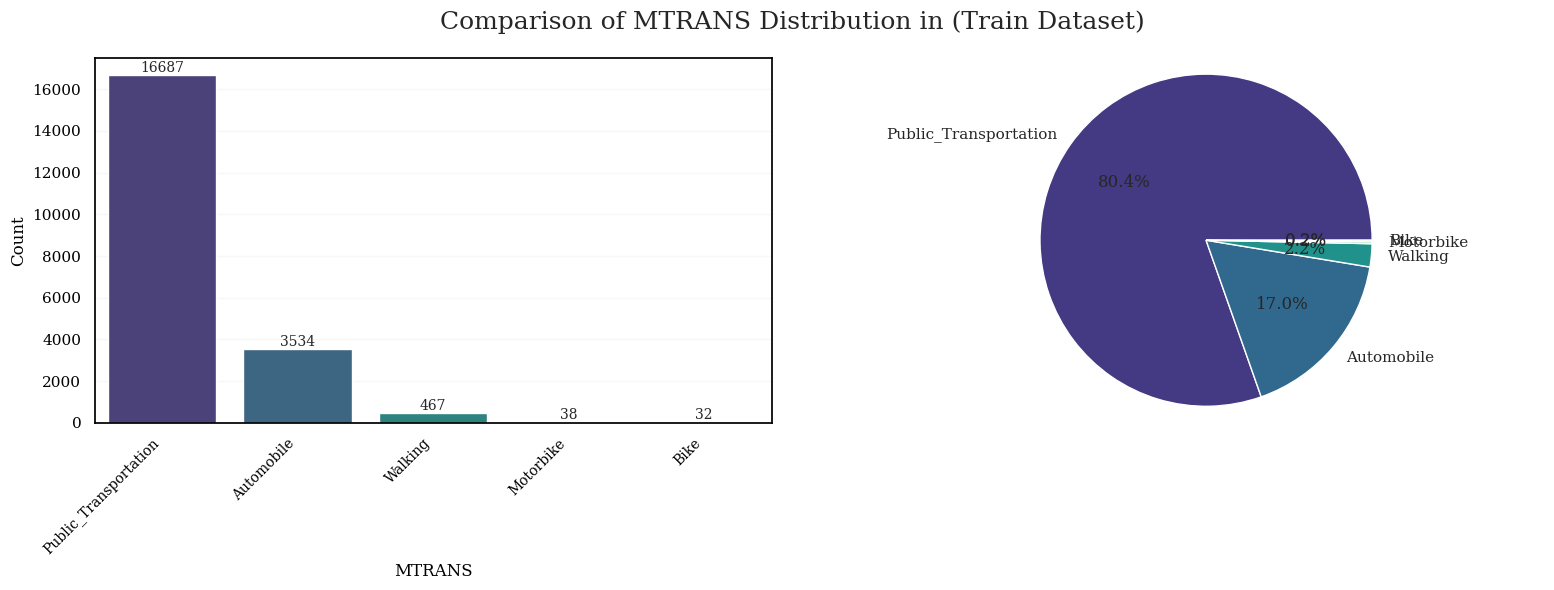

In [39]:
for column in categorical_vars:
    plot_distribution(df_train, column)


<a id="3"></a>
## <b>3.3 <span style='color:#E1B12D'>Plotting Histograms and Density Plots for Continuous Variables</span></b> 

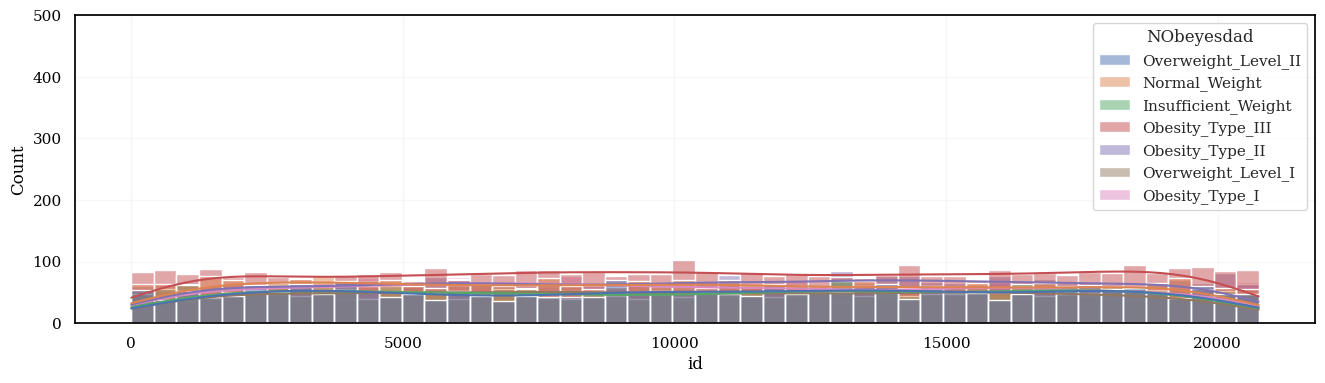

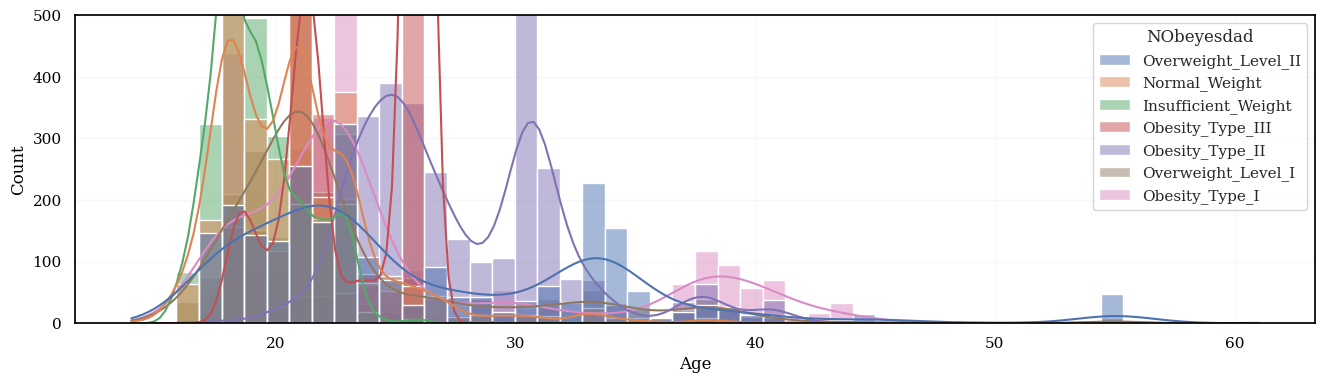

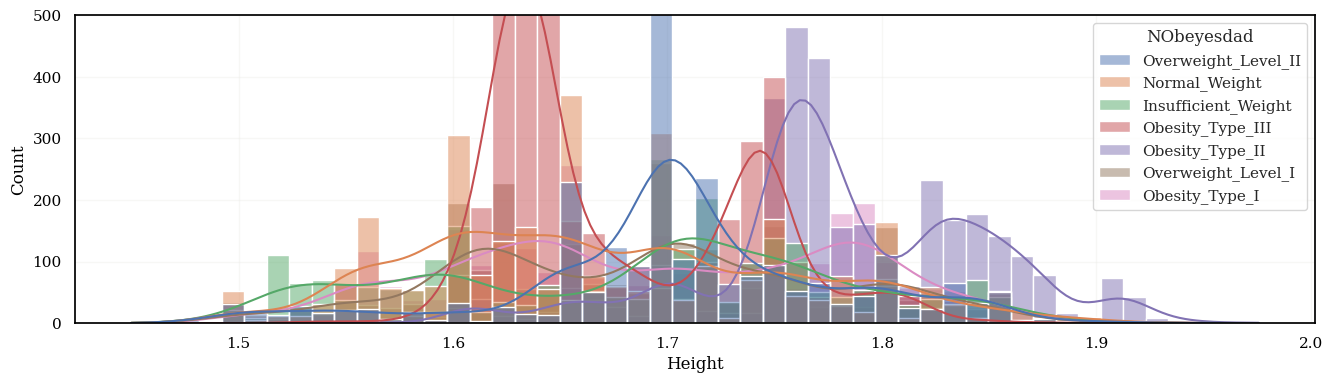

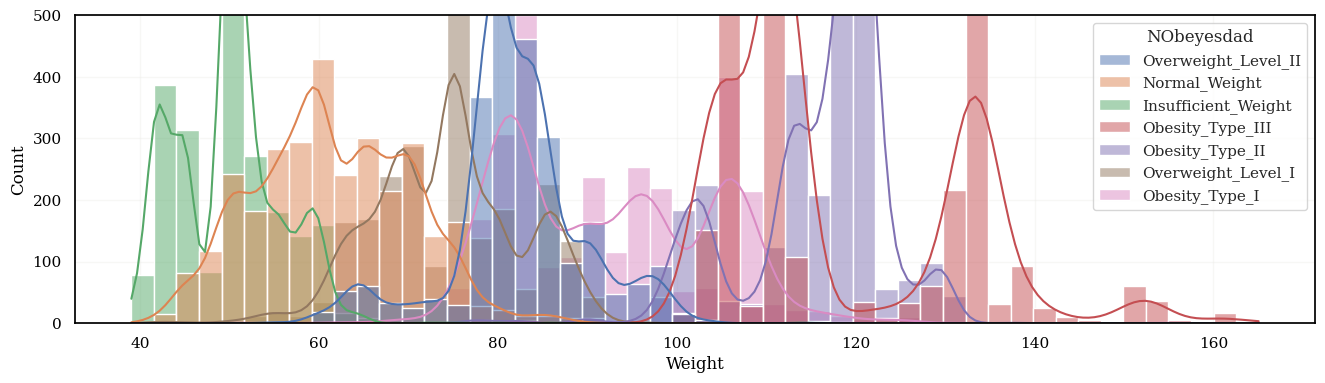

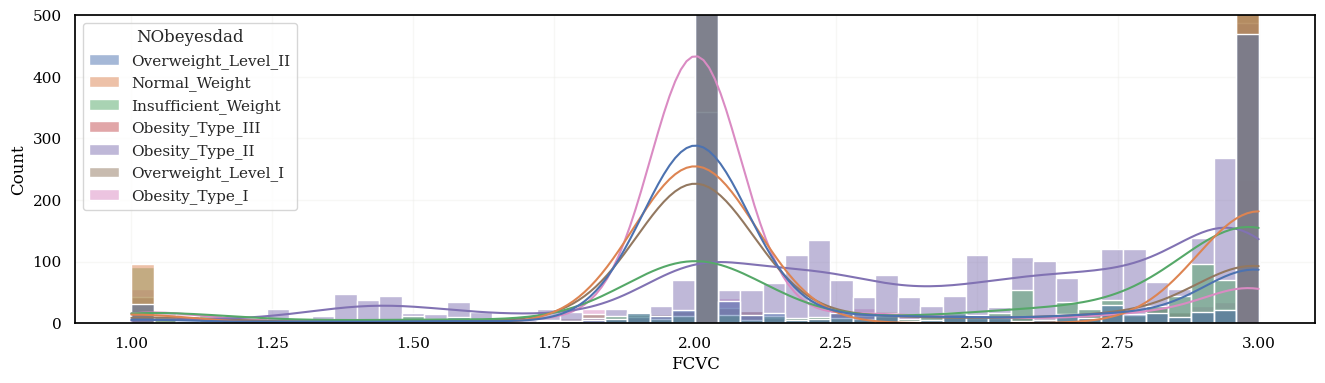

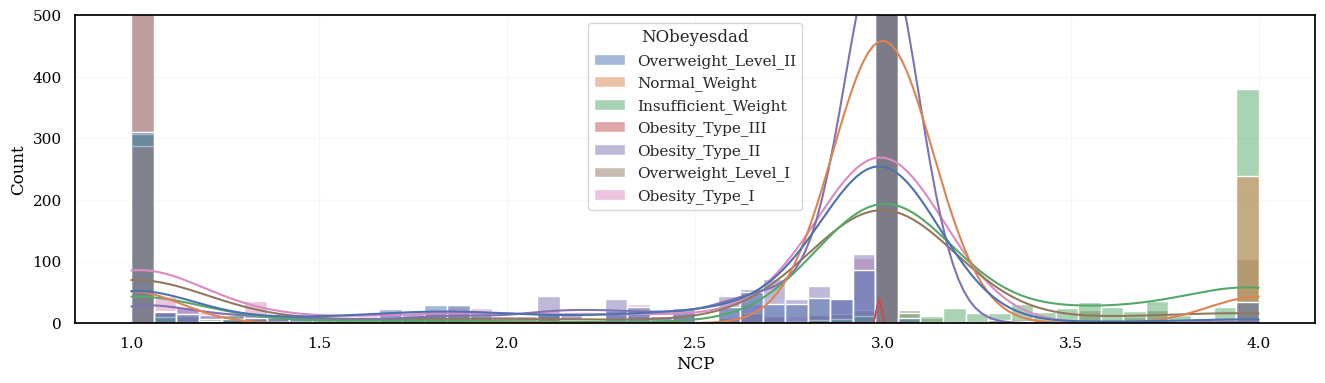

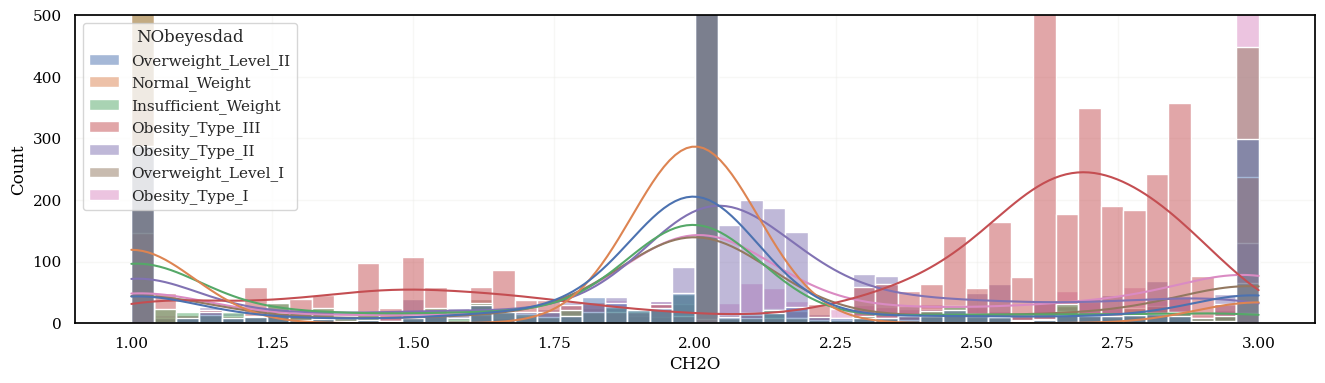

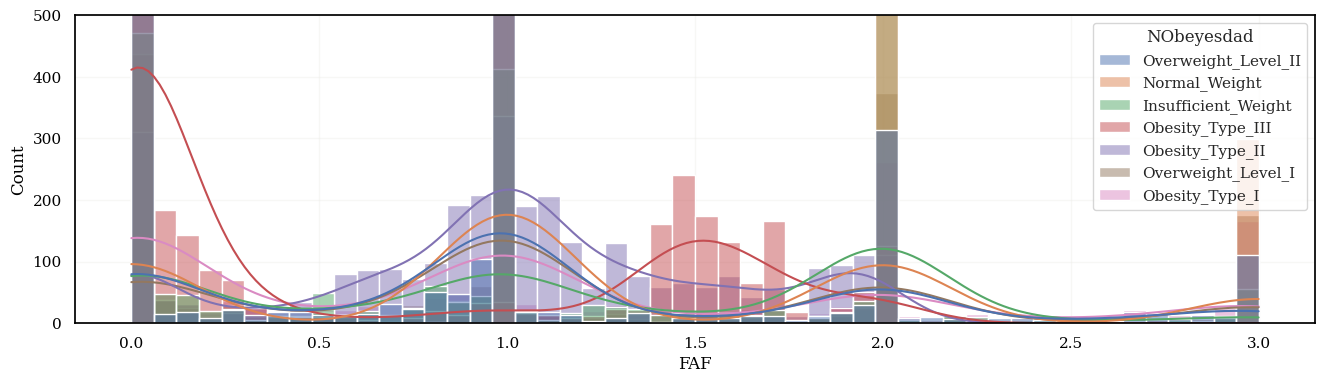

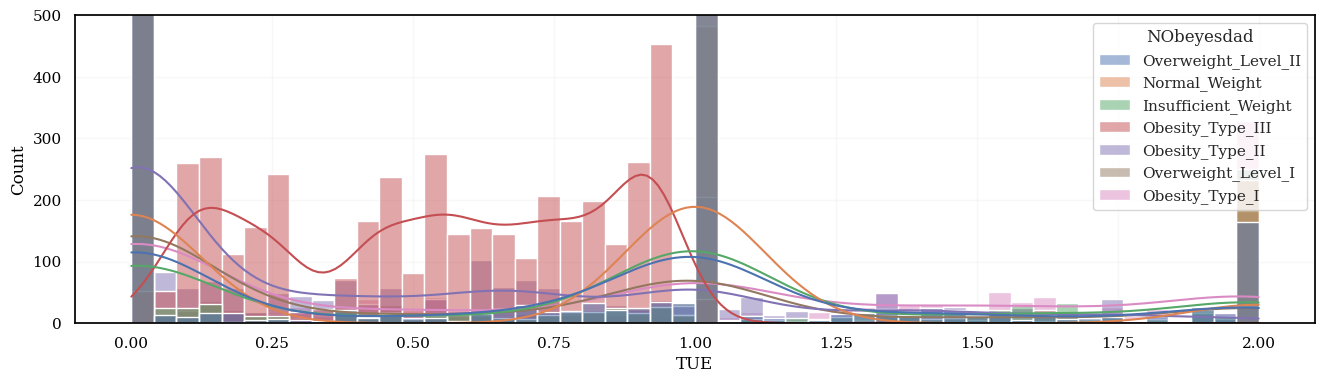

In [41]:
def plot_histograms_and_density(dataframe, columns):
    for column in columns:
        fig, ax = plt.subplots(figsize=(16, 4))
        fig = sns.histplot(data=df_train, x=column, hue="NObeyesdad", bins=50, kde=True)
        plt.ylim(0,500)
        plt.show()
        
plot_histograms_and_density(df_train, continuous_vars)

<a id="4"></a>
## <b>4. <span style='color:#E1B12D'>Pre-Processing</span></b> 

In [44]:
train = pd.concat([df_train, original]).drop(['id'], axis=1).drop_duplicates()
test = df_test.drop(['id'], axis=1)

In [45]:
train = pd.get_dummies(train, columns=categorical_vars, drop_first=True)
test = pd.get_dummies(test, columns=categorical_vars, drop_first=True)

In [46]:
#Let's check the Shape of data
print(f'The encoded Train dataset has {train.shape[0]} rows and {train.shape[1]} columns')
print(f'The encoded Test dataset has {test.shape[0]} rows and {test.shape[1]} columns')

The encoded Train dataset has 22845 rows and 24 columns
The encoded Test dataset has 13840 rows and 23 columns


In [47]:
X = train.drop(['NObeyesdad'], axis=1)
y = train['NObeyesdad']

In [48]:
X.shape

(22845, 23)

In [49]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


<a id="5"></a>
## <b>5. <span style='color:#E1B12D'>Model Building</span></b> 


In [50]:
# Run optuna for best parameters
# # Define the objective function for Optuna optimization
# import optuna
# from optuna.samplers import TPESampler

# def objective(trial, X_train, y_train, X_test, y_test):
#      # Define parameters to be optimized for the LGBMClassifier
#      param = {
#          "objective": "multiclass",
#          "metric": "multi_logloss",
#          "verbosity": -1,
#          "boosting_type": "gbdt",
#          "random_state": 42,
#          "num_class": 7,
#          "learning_rate": trial.suggest_float("learning_rate", 0.001, 0.2),
#          "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
#          "lambda_l1": trial.suggest_float("lambda_l1", 0.005, 0.015),
#          "lambda_l2": trial.suggest_float("lambda_l2", 0.02, 0.06),
#          "max_depth": trial.suggest_int("max_depth", 5, 20),
#          "colsample_bytree": trial.suggest_float("colsample_bytree", 0.3, 0.9),
#          "subsample": trial.suggest_float("subsample", 0.8, 1.0),
#          "min_child_samples": trial.suggest_int("min_child_samples", 5, 50),
#      }

#  # LGBMClassifier with the suggested parameters
#      lgbm_classifier = LGBMClassifier(**param)
    
# # Fit 
#      lgbm_classifier.fit(X_train, y_train)

# # Evaluate
#      score = lgbm_classifier.score(X_test, y_test, )

#      return score

# # Train Test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

# #sampler for Optuna optimization
# sampler = optuna.samplers.TPESampler(seed=42)  # Using Tree-structured Parzen Estimator sampler for optimization

# # Create a study object
# study = optuna.create_study(direction="maximize", sampler=sampler)

# # Run the optimization process
# study.optimize(lambda trial: objective(trial, X_train, y_train, X_test, y_test), n_trials=50)

# # best parameters after optimization
# best_params = study.best_params

# print('='*50)
# print(best_params)

In [51]:
# Result of optuna
best_params = {
    "objective": "multiclass",          # Objective function for the model
    "metric": "multi_logloss",          # Evaluation metric
    "verbosity": -1,                    # Verbosity level (-1 for silent)
    "boosting_type": "gbdt",            # Gradient boosting type
    "random_state": 42,       # Random state for reproducibility
    "num_class": 7,                     # Number of classes in the dataset
    'learning_rate': 0.01197852738297134,  # Learning rate for gradient boosting
    'n_estimators': 509,                # Number of boosting iterations
    'lambda_l1': 0.009715116714365275,  # L1 regularization term
    'lambda_l2': 0.03853395161282091,   # L2 regularization term
    'max_depth': 11,                    # Maximum depth of the trees
    'colsample_bytree': 0.7364306508830604,  # Fraction of features to consider for each tree
    'subsample': 0.9529973839959326,    # Fraction of samples to consider for each boosting iteration
    'min_child_samples': 17             # Minimum number of data needed in a leaf
}

In [52]:
lgbm_classifier = LGBMClassifier(**best_params)
lgbm_classifier.fit(X_train, y_train)
y_pred = lgbm_classifier.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred) 

0.9159553512803676

In [54]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

Insufficient_Weight       0.93      0.95      0.94       574
      Normal_Weight       0.90      0.90      0.90       677
     Obesity_Type_I       0.93      0.88      0.90       682
    Obesity_Type_II       0.96      0.97      0.97       697
   Obesity_Type_III       1.00      1.00      1.00       878
 Overweight_Level_I       0.80      0.82      0.81       525
Overweight_Level_II       0.83      0.84      0.83       536

           accuracy                           0.92      4569
          macro avg       0.91      0.91      0.91      4569
       weighted avg       0.92      0.92      0.92      4569



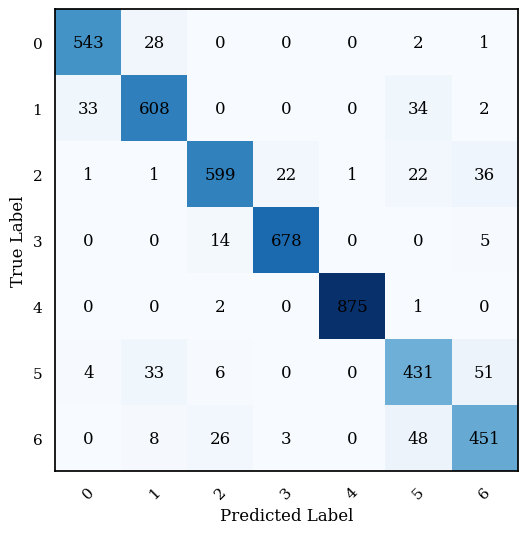

In [55]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
from lightgbm import LGBMClassifier, plot_importance
plt.figure(figsize=(15, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
conf_labels = [f'{i}' for i in range(conf_matrix.shape[0])]
conf_matrix_df = pd.DataFrame(conf_matrix, columns=conf_labels, index=conf_labels)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.xticks(np.arange(conf_matrix.shape[0]), conf_labels, rotation=45)
plt.yticks(np.arange(conf_matrix.shape[0]), conf_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='black')
plt.grid(False)
plt.show()

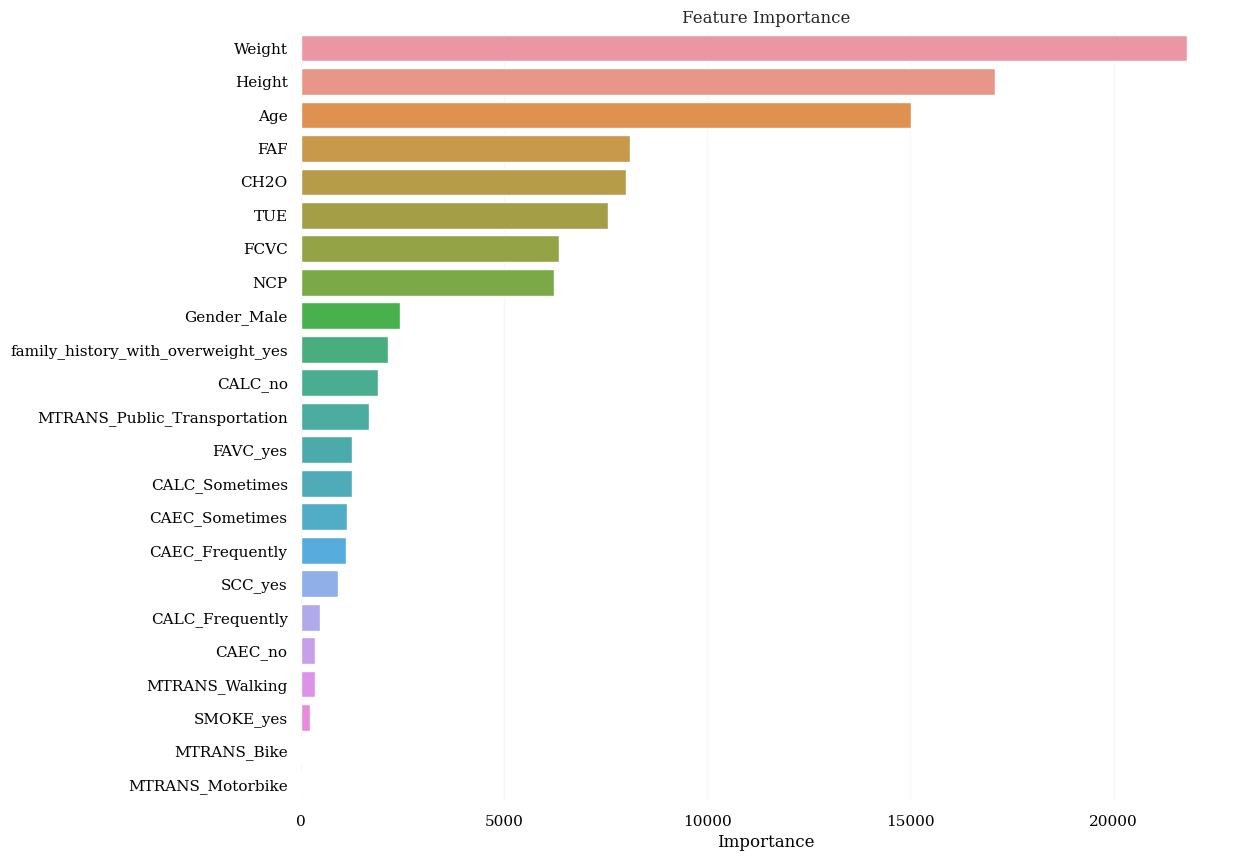

In [56]:
# feature importances
feature_importance = lgbm_classifier.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('')
sns.despine(left=True, bottom=True)
plt.show()


<a id="6"></a>
## <b>6. <span style='color:#E1B12D'>Prediction on Test data</span></b> 


In [57]:
# Evaluate the best model on the test set
predictions = lgbm_classifier.predict(test)

In [58]:
submission = pd.read_csv("/kaggle/input/playground-series-s4e2/sample_submission.csv")
submission["NObeyesdad"] = predictions
submission.to_csv("submission1.csv", index=False)
submission.head()

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
